# ENVE 2023 Class Profile Jupyter Notebook

### Created by Sujeethan Vigneswaran

Acknowledgements:
    Thanks to Nolan Dey from SYDE 2019 for some of the [plot styling code](https://github.com/ndey96/SYDE-Survey)
    
# # Thank you to the Environmental Engineering Class of 2023 for the an awesome last 5 years

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

figsize = (12, 9)

In [3]:
def apply_styling(style_params=None):
    sns.set(palette='muted')
    params = {
        'axes.titlesize': 24,
        'axes.labelsize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'axes.titlepad': 20,
        'axes.titlepad': 20,
        'legend.fontsize': 18
    }
    if style_params:
        params.update(style_params)
    plt.rcParams.update(params)

In [4]:
def barh(col,
         fname,
         data=None,
         bar_order=None,
         title=None,
         style_params=None,
         colors=sns.color_palette('muted')):
    if data is None:
        data = df[col]
    data = [x for x in data if not (type(x) == float and np.isnan(x))]
    c = Counter(data)
    bar_df = pd.DataFrame({'keys': list(c.keys()), 'vals': list(c.values())})
    if bar_order:
        bar_df['ii'] = [bar_order.index(x) for x in bar_df['keys']]
        bar_df = bar_df.sort_values(by='ii', ascending=True)
    else:
        bar_df = bar_df.sort_values(by='vals', ascending=True)

    labels = bar_df['keys']
    bar_df['vals'] /= len(data)
    y_pos = np.arange(len(bar_df))
    plt.figure(figsize=figsize)
    apply_styling(style_params)
    plt.barh(y_pos, bar_df['vals'], align='center', color=colors)
    plt.yticks(y_pos, labels)

    max_val = bar_df['vals'].max()
    if max_val > 0.5:
        step = 0.1
    elif max_val > 0.15:
        step = 0.05
    else:
        step = 0.02
    tick_max = np.ceil(max_val / step) * step
    plt.xticks(np.arange(0, tick_max + step, step))

    plt.gca().set_xticklabels(
        ['{:.0f}%'.format(x * 100) for x in plt.gca().get_xticks()])
    plt.xlabel('Percentage of Respondents')
    if title:
        plt.title(title)
    else:
        plt.title(col)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_bar')
    plt.show()
    plt.close()

In [6]:
# category_names = ['Strongly disagree', 'Disagree','Neither agree nor disagree', 'Agree', 'Strongly agree']
# results = {
#     'Question 1': [10, 15, 17, 32, 26],
#     'Question 2': [26, 22, 29, 10, 13]
# }
def stack_barh(fname,
         results=None,
         category_names=None,
         bar_order=None,
         title=None,
         style_params=None,
         colors=sns.color_palette('muted')):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = sns.color_palette("RdYlGn", data.shape[1])
    
    fig, ax = plt.subplots(figsize=figsize)
    apply_styling(style_params)

    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        r, g, b = color
    ax.legend(loc='lower left', fontsize='small', bbox_to_anchor=(0, 1), ncol=5)

    
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + 'stack_bar')
    plt.show()
    plt.close()

In [7]:
def boxplot(fname, title, xlabels, ylabel, data=None, xlabel=None):
    boxplot_data = data
    plt.figure(figsize=figsize)
    apply_styling()
    sns.boxplot(data=boxplot_data)
    plt.ylabel(ylabel)
    plt.gca().set_xticklabels(xlabels)
    plt.title(title)
    plt.xlabel('Term')
    if xlabel:
        plt.xlabel(xlabel)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_boxplot')
    plt.show()
    plt.close()

In [8]:
def density(cols,
            fname,
            title,
            xlabel,
            hist=True,
            normed=False,
            bins=None,
            labels=None,
            xlims=None,
            ylims=None,
            line_labels=None,
            data=None,
            colors=None):
    plt.figure(figsize=figsize)
    apply_styling()
    if type(cols) is not list:
        cols = [cols]

    if data is None:
        data = df[cols]

    for idx, col in enumerate(cols):
        plot_params = {}
        line_label = None
        if line_labels:
            plot_params['label'] = line_labels[idx]
        if len(cols) == 1:
            data = {col: data}
        if hist:
            plot_params['hist'] = True
            plot_params['hist_kws'] = {'align': 'left'}
            if normed:
                plot_params['hist_kws']['density'] = True
            plot_params['kde'] = False
            if bins is not None:
                plot_params['bins'] = bins
        else:
            plot_params['hist'] = False
            plot_params['kde'] = True
            plot_params['kde_kws'] = {'shade': True, 'linewidth': 3}

        if colors:
            plot_params['color'] = colors[idx]    
        sns.distplot(data[col], **plot_params)
        
    if xlims:
        plt.xlim(xlims)
    if ylims:
        plt.ylim(ylims)
    if labels:
        plt.gca().set_xticklabels(labels)
    if hist and line_labels:
        plt.legend()
    if hist and not normed:
        plt.ylabel('Number of Respondents')
    else:
        plt.ylabel('Proportion of Respondents')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_density')
    plt.show()
    plt.close()


In [9]:
def line(y_col, fname, title, data, ylims=None):
    plt.figure(figsize=figsize)
    apply_styling()
    sns.lineplot(x='Term', y=y_col, data=data, ci='sd')
    if ylims:
        plt.ylim(ylims)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_lineplot')
    plt.show()
    plt.close()

In [10]:
def stacked_line(data, fname, title, colors=None):
    plt.figure(figsize=figsize)
    apply_styling()
    plt.stackplot(
        ["1A", "1B", "2A", "2B", "3A", "3B"],
        list(data.values()),
        labels=list(data.keys()),
        colors=colors)
    plt.legend(loc='lower right')
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.gca().set_yticklabels(
        ['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
    # plt.ylim(0, len(df) + 1)
    plt.ylabel('Percentage of Respondents')
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_stacked_lineplot')
    plt.show()
    plt.close()

In [11]:
def scatter(x, y, fname, title, xlabel, ylabel):
    plt.figure(figsize=figsize)
    apply_styling()
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_scatter')
    plt.show()
    plt.close()

In [12]:
def pie(x, fname, title, labels, startangle=None):
    plt.figure(figsize=(7, 7))
    apply_styling()
    plt.pie(
        x,
        labels=labels,
        autopct='%1.1f%%',
        startangle=startangle,
        textprops={'fontsize': 18})
    plt.title(title)
    plt.tight_layout()
    plt.savefig('graphs/' + fname + '_pie')
    plt.show()
    plt.close()

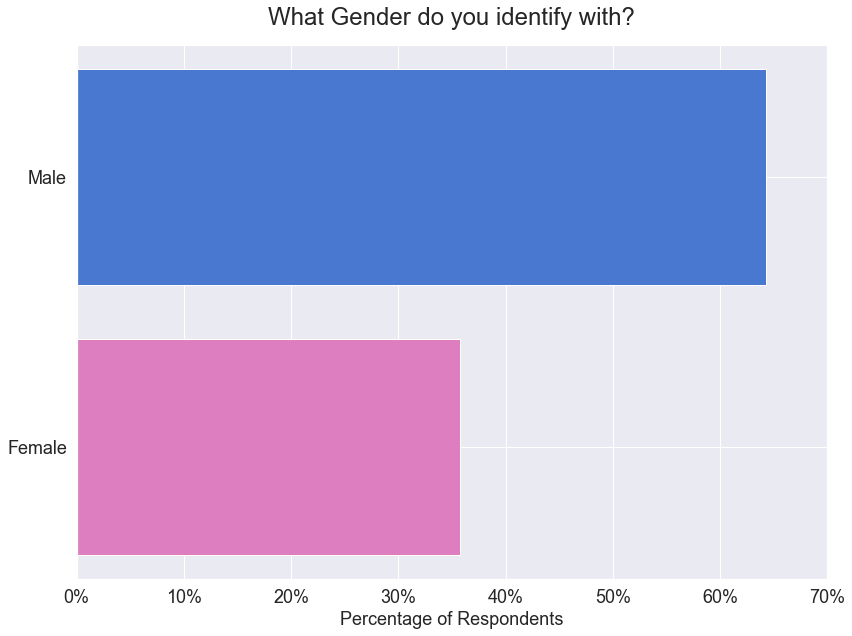

In [11]:
# Gender
barh(
    'What Gender do you identify with?',
    'gender',
    data=["Female","Female","Female","Female","Female","Male","Male","Male","Male","Male","Male","Male","Male","Male"], 
    colors=[sns.color_palette('muted')[6], sns.color_palette('muted')[0]]
)


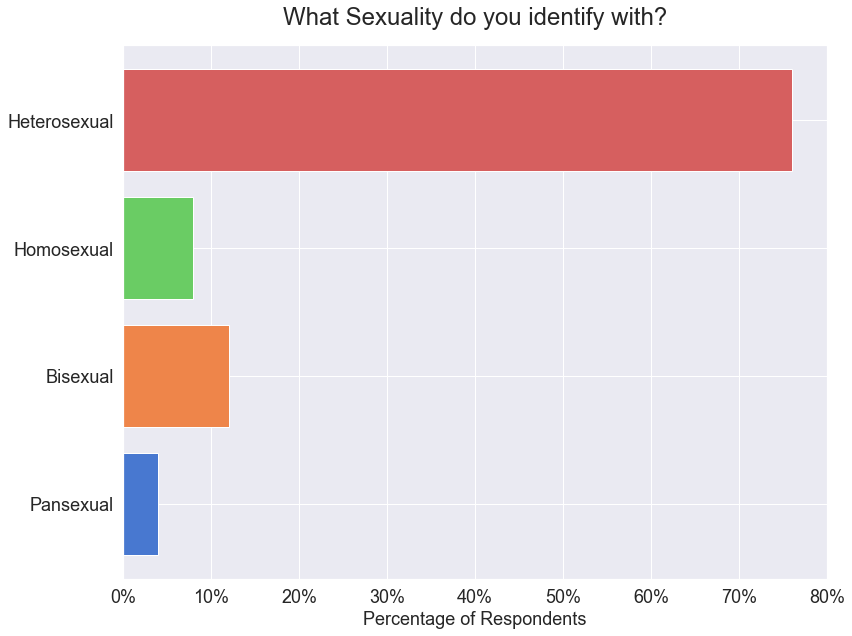

In [12]:
# Sexuality
sexuality_bar_order = ['Heterosexual','Homosexual','Bisexual','Pansexual']
barh(
    'What Sexuality do you identify with?',
    'sexuality',
    data=["Bisexual","Bisexual","Bisexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Heterosexual","Homosexual","Homosexual","Pansexual"],
    bar_order=sexuality_bar_order[::-1]
)

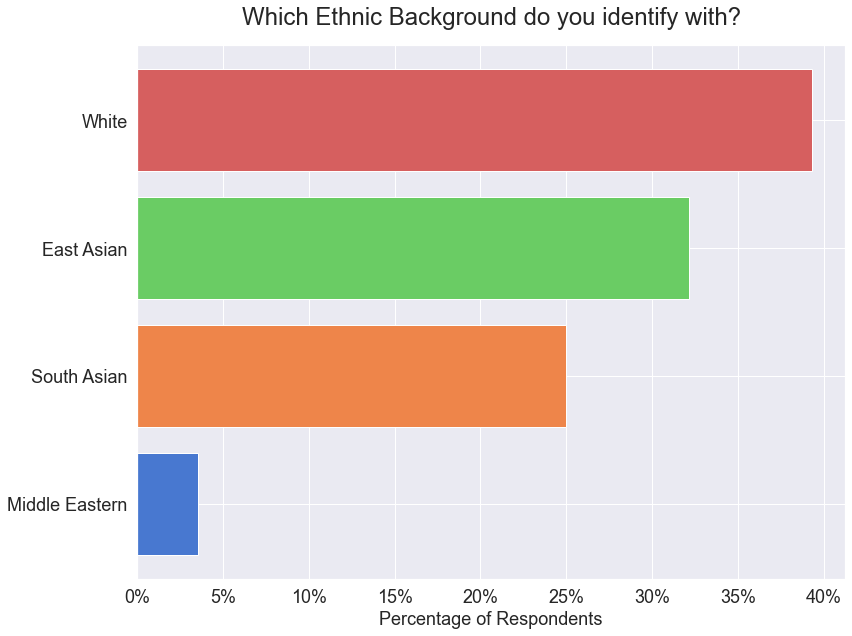

In [13]:
# Ethnicity
barh(
    'Which Ethnic Background do you identify with?',
    'ethnicity',
    data=["East Asian","East Asian","East Asian","East Asian","East Asian","East Asian","East Asian","East Asian","East Asian","Middle Eastern","South Asian","South Asian","South Asian","South Asian","South Asian","South Asian","South Asian","White","White","White","White","White","White","White","White","White","White","White"]
)

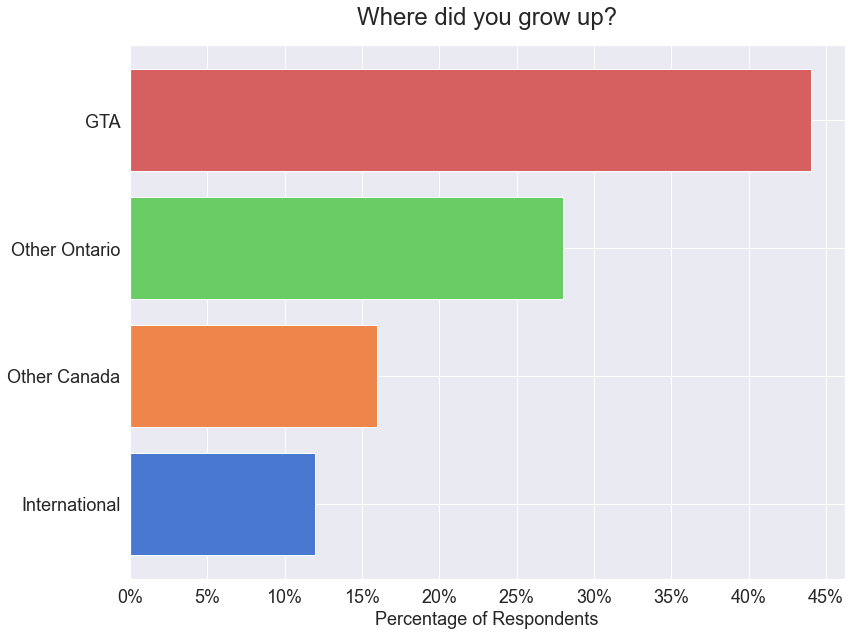

In [14]:
# Hometown
barh(
    'Where did you grow up?', 
    'home_town', 
    data=["GTA","GTA","GTA","GTA","GTA","GTA","GTA","GTA","GTA","GTA","GTA","International","International","International","Other Canada","Other Canada","Other Canada","Other Canada","Other Ontario","Other Ontario","Other Ontario","Other Ontario","Other Ontario","Other Ontario","Other Ontario"]
)

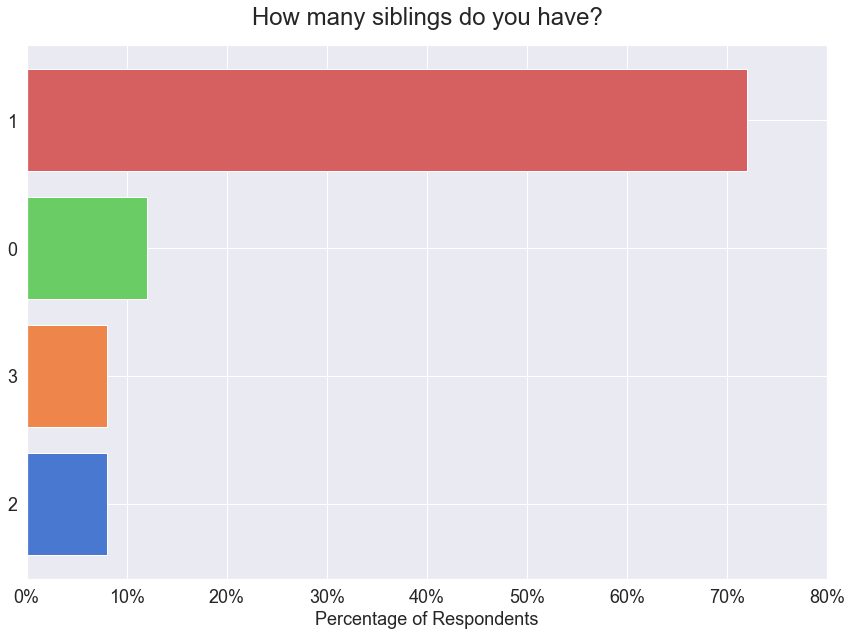

In [15]:
# Number of Siblings
barh(
    'How many siblings do you have?', 
    'siblings', 
    data=["0","0","0","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","2","2","3","3"]
)

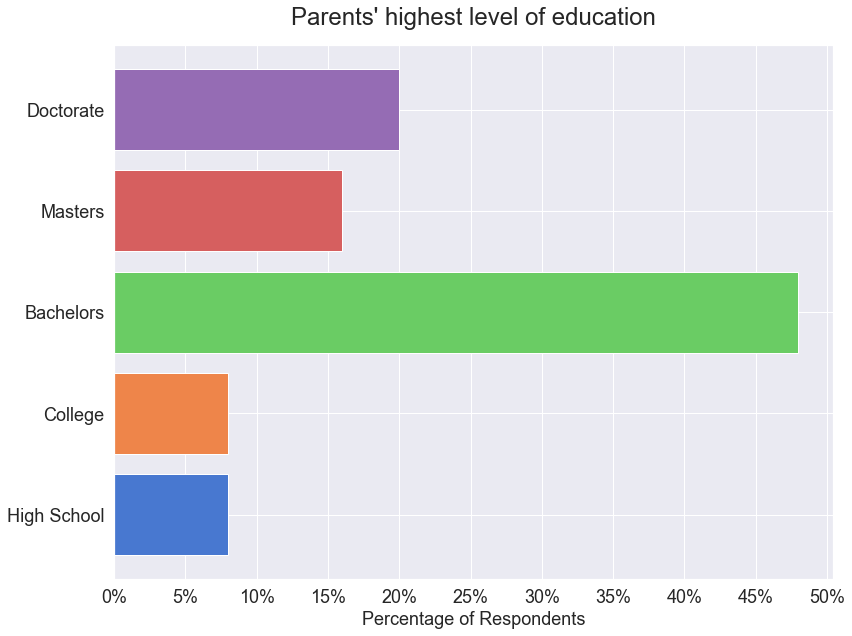

In [16]:
# Parent Education
barh(
    'What is the Highest Level of education achieved by either of your parents?',
    'parent_education',
    title="Parents' highest level of education",
    data=["Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","Bachelors","College","Doctorate","Doctorate","Doctorate","Doctorate","Doctorate","High School","High School","Masters","Masters","Masters","Masters","College"],
    bar_order=["High School","College","Bachelors","Masters","Doctorate"]
)

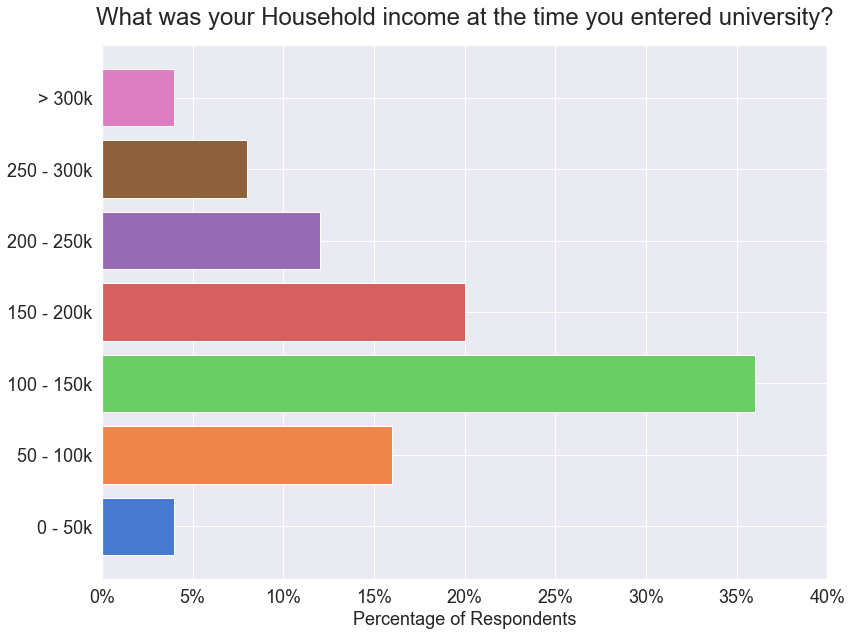

In [17]:
# Household Income
barh(
    "What was your Household income at the time you entered university?",
    'household_income',
    bar_order=["0 - 50k", "50 - 100k", "100 - 150k", "150 - 200k", "200 - 250k", "250 - 300k", "> 300k"],
    data=["0 - 50k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","100 - 150k","150 - 200k","150 - 200k","150 - 200k","150 - 200k","150 - 200k","200 - 250k","200 - 250k","200 - 250k","250 - 300k","250 - 300k","50 - 100k","50 - 100k","50 - 100k","50 - 100k","> 300k"]
)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


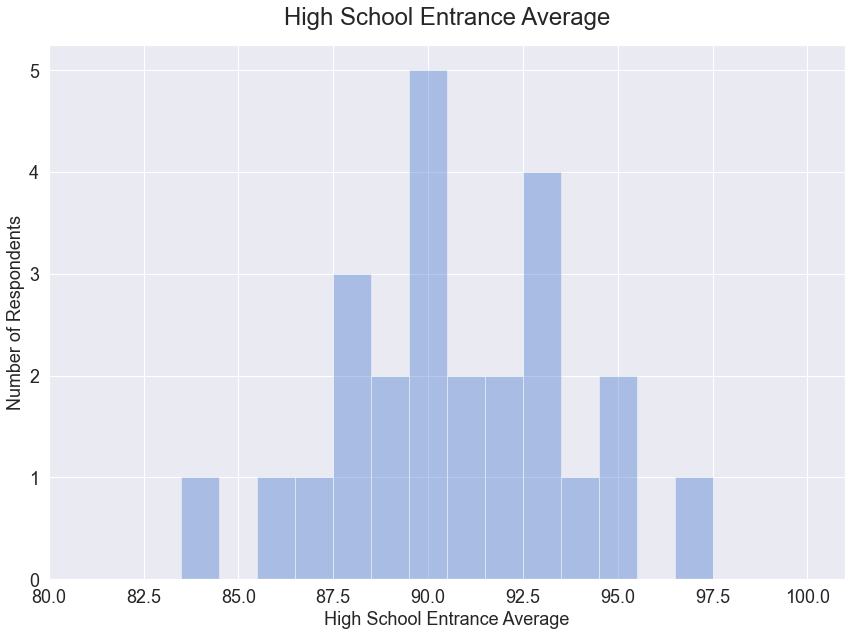

In [18]:
# High School Entrance Average
density(
    'What was your entrance average from high-school?',
    'hs_avg',
    'High School Entrance Average',
    data=["84","86","87","88","88","88","89","89","90","90","90","90","90","91","91","92","92","93","93","93","93","94","95","95","97"],
    xlabel='High School Entrance Average',
    xlims=(80, 101),
    bins=np.arange(80, 100 + 2, 1)
)

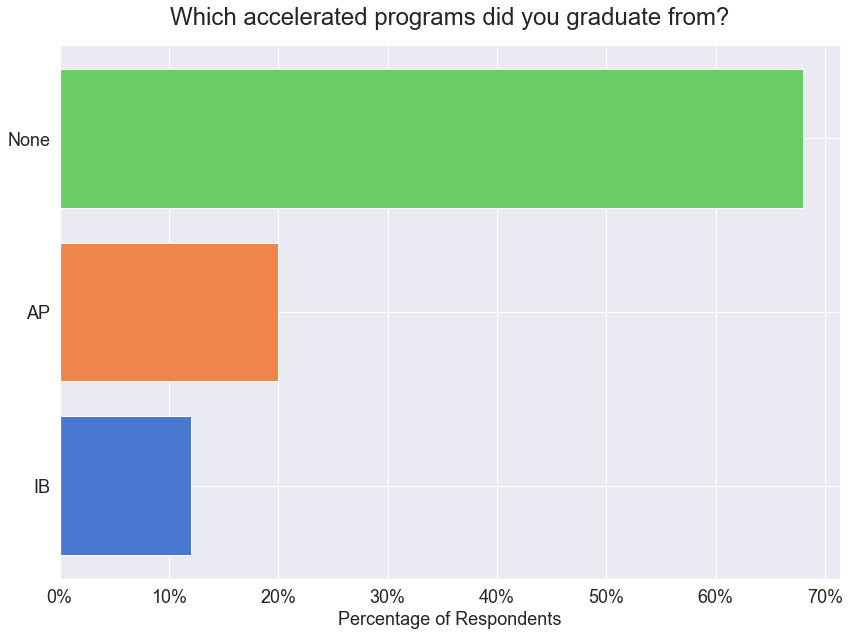

In [19]:
# Accelerated Program
barh(
    'Which of the following accelerated programs, if any, did you graduate from?',
    'accelerated_programs',
    data = ["AP","AP","AP","AP","AP","IB","IB","IB","None","None","None","None","None","None","None","None","None","None","None","None","None","None","None","None","None"],
    title='Which accelerated programs did you graduate from?')

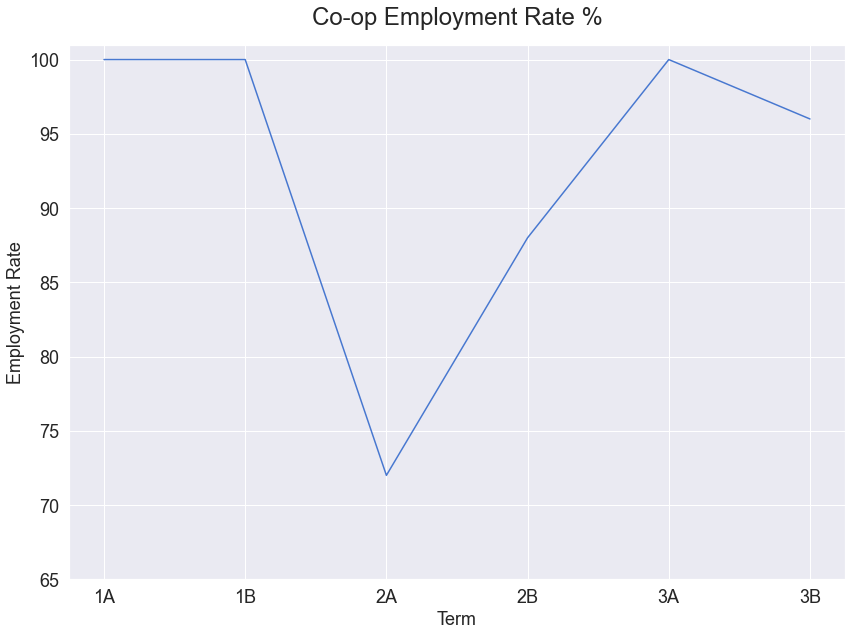

In [20]:
# Employment Rate
line(
    y_col='Employment Rate',
    fname='employment_rate',
    title='Co-op Employment Rate %',
    ylims=(65, 101),
    data=pd.DataFrame({'Term': ["1A", "1B", "2A", "2B", "3A", "3B"], 'Employment Rate': [100, 100, 72, 88, 100, 96]}))

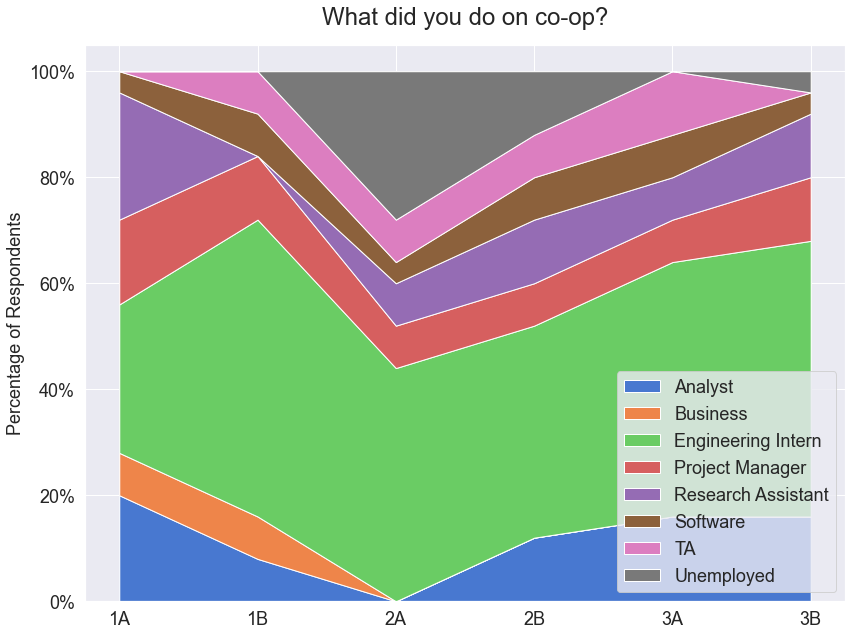

In [21]:
# Job Titles
job_titles = ['Analyst','Business','Engineering Intern','Project Manager','Research Assistant','Software','TA','Unemployed']
stacked_line(
    data={'Analyst':[5/25,2/25,0/25,3/25,4/25,4/25],'Business':[2/25,2/25,0,0,0,0],'Engineering Intern':[7/25,14/25,11/25,10/25,12/25,13/25],'Project Manager':[4/25,3/25,2/25,2/25,2/25,3/25],'Research Assistant':[6/25,0/25,2/25,3/25,2/25,3/25],'Software':[1/25,2/25,1/25,2/25,2/25,1/25],'TA':[0,2/25,2/25,2/25,3/25,0/25],'Unemployed':[0,0,7/25,3/25,0,1/25]},
    fname='job_titles',
    title='What did you do on co-op?',
    colors=sns.color_palette() + [(0, 0, 0)])

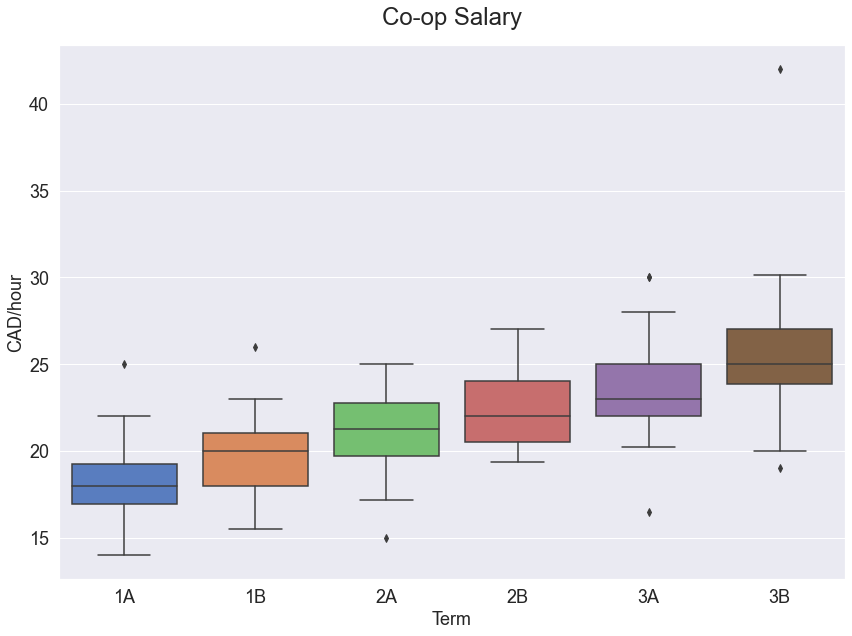

In [22]:
# Co-op Hourly Salary
boxplot(
    'coop_salary',
    'Co-op Salary',
    data = [
        [14,14,14.43,15,16,16.75,17,17,17,17.31,18,18,18,18.2,18.5,19,19,19,20,20,22,22,22,25],
        [15.5,17,17,17.15,17.64,18,18,18,18.5,19,19,20,20,20,20,20,21,21,21.04,22,22,22,23,23,26],
        [25,21,23,19,21.5,15,23,20,24,22,19,21,22,24,22,19.62,20,17.15],
        [27,21,26,20,22,20.23,23,23,26,26,22,24,25,21.5,22,20.5,20,20,22.5,21.4,19.33],
        [30,24,27,25,21.5,20.23,21,24,30,28,24.5,23,16.5,25,21.5,23,25,22,28,22,23,24,22,22,22.5],
        [42,23,30,23.5,25,20,19,24,25,26,21,27,25,27,30.12,25,26,25,25,27.72,28.7,25,23,25.13]
    ],
    xlabels=["1A", "1B", "2A", "2B", "3A", "3B"],
    ylabel='CAD/hour')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


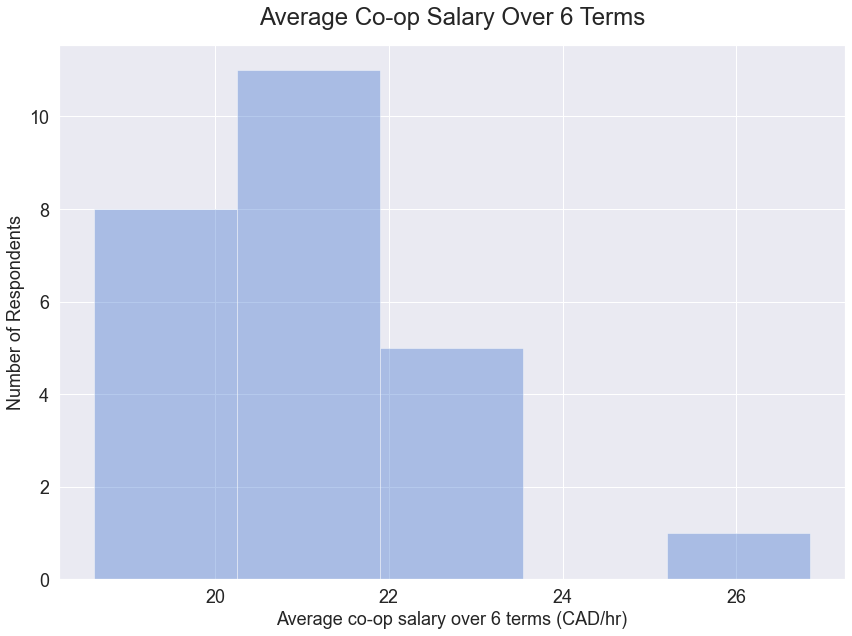

In [13]:
# Average Salary Histogram

density(
    'Average co-op salary over 6 terms',
    fname='coop_mean_salary',
    title='Average Co-op Salary Over 6 Terms',
    data = [21.25,19.43,20.00,22.83,19.92,21.87,21.67,24.33,21.20,22.67,23.25,19.80,24.17,19.75,22.00,21.40,21.23,21.75,27.67,23.67,21.00,21.67,21.48,20.25,20.25],
    xlabel='Average co-op salary over 6 terms (CAD/hr)'
)

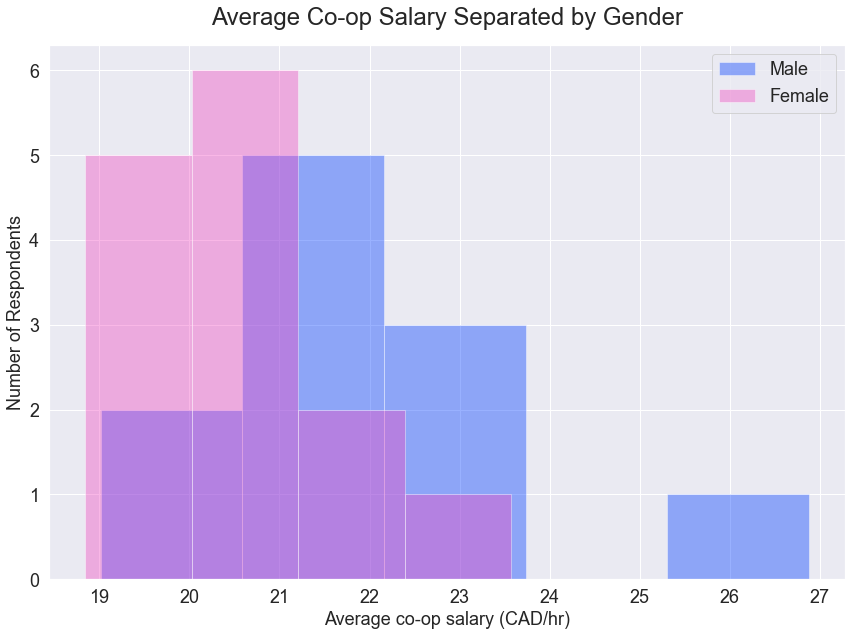

In [14]:
# Average Salary Histogram by Gender

gender_vs_wage_data = {}
gender_vs_wage_data['Male'] = [22.83333333,24.33333333,23.25,19.8,22,21.4,21.75,27.66666667,23.66666667,21.66666667,20.25]
gender_vs_wage_data['Female'] = [21.25,19.432,20,19.91666667,21.865,21.66666667,21.2,22.66666667,24.16666667,19.75,21.234,21,21.47833333,20.252]
density(
    cols=['Male', 'Female'],
    fname='gender_vs_wage',
    title='Average Co-op Salary Separated by Gender',
    xlabel='Average co-op salary (CAD/hr)',
    data=gender_vs_wage_data,
    line_labels=['Male', 'Female'],
    colors=[sns.color_palette('bright')[0],
            sns.color_palette('bright')[6]])

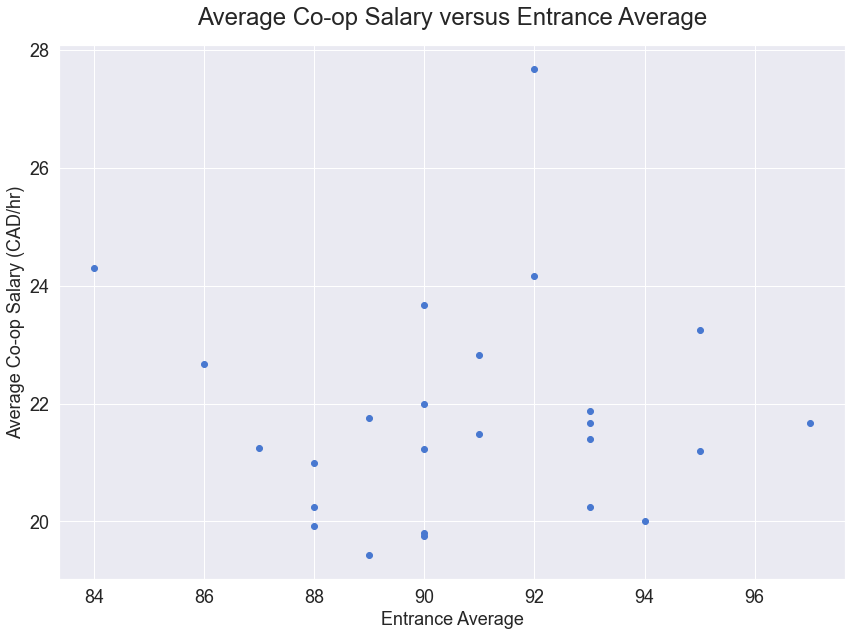

In [25]:
# Average Salary Histogram by Entrance Average

scatter(
    x=[92,93,92,87,97,89,90,90,91,84,88,95,88,86,91,90,89,95,93,90,93,90,94,93,88],
    y=[27.67,21.67,24.167,21.25,21.67,19.432,19.75,23.67,22.83,24.3,21,21.2,19.9167,22.67,21.4783,22,21.75,23.25,21.4,19.8,21.865,21.234,20,20.25,20.252],
    fname='marks_vs_wage',
    title='Average Co-op Salary versus Entrance Average',
    xlabel='Entrance Average',
    ylabel='Average Co-op Salary (CAD/hr)')

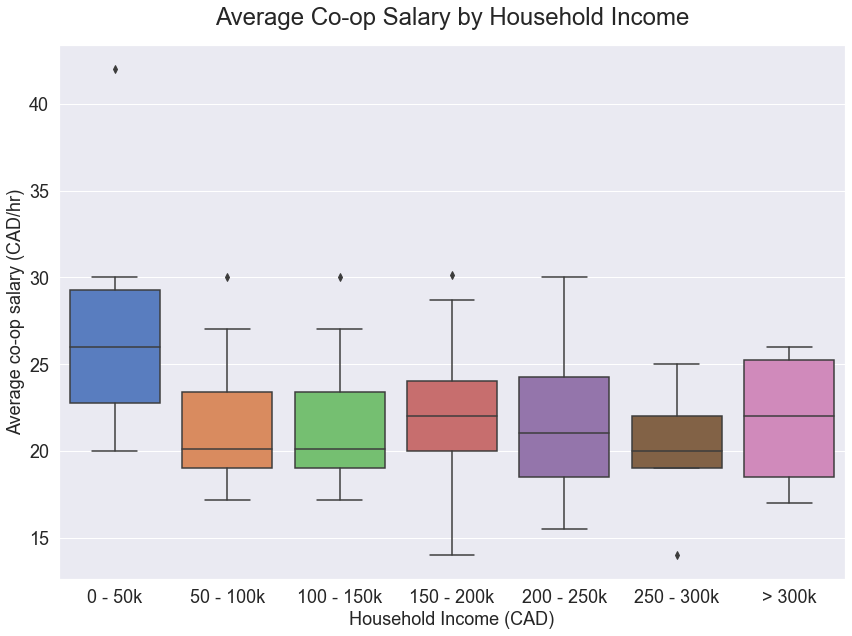

In [26]:
# Average Salary Histogram by Household income

boxplot(
    fname='household_income_vs_salary',
    title='Average Co-op Salary by Household Income',
    xlabels=["0 - 50k", "50 - 100k", "100 - 150k", "150 - 200k", "200 - 250k", "250 - 300k", "> 300k"],
    ylabel='Average co-op salary (CAD/hr)',
    data=[
        [22, 20, 25, 27, 30, 42],
        [30,23.5,20,25.13,27,25,20.23,22.5,26,20,20.23,19.33,23,19,17.15,20,22,18.5,17.15,19,18,18.2],
        [30,23.5,20,25.13,27,25,20.23,22.5,26,20,20.23,19.33,23,19,17.15,20,22,18.5,17.15,19,18,18.2], 
        [18,19,18.5,22,20,15,17,16.75,20,25,17,14,14.43,18,23,21,22,26,22,19,21,17,20,23,20,18,17.64,18,21,21.5,15,23,24,22,21,22,24,22,21,22,23,23,26,25,21.5,22,20.5,20,20,21.4,24,21.5,21,24,28,23,25,21.5,23,22,28,22,24,22,23,25,19,24,26,27,27,30.12,25,25,25,28.7,23],
        [25,21,25,27.72,30,24.5,16.5,23,26,22,24,22.5,20,19,19.62,20,15.5,18,21.04,16,22,17,17.31],
        [14, 19, 20, 22, 25],
        [19, 17, 25, 26]
    ],
    xlabel='Household Income (CAD)'
)

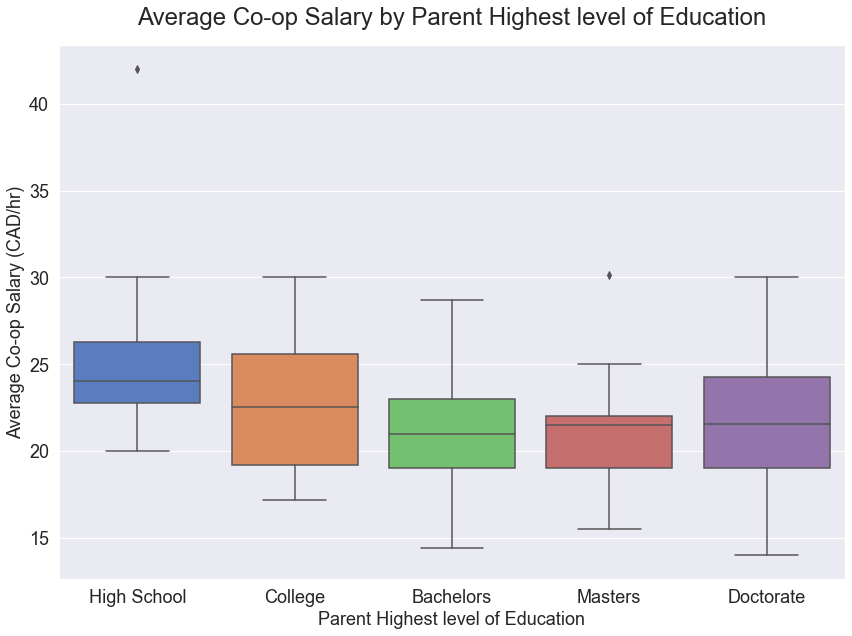

In [27]:
# Average Salary Histogram by Parent's Education

boxplot(
    fname='parental_education_vs_salary',
    title='Average Co-op Salary by Parent Highest level of Education',
    xlabels=["High School","College","Bachelors","Masters","Doctorate"],
    ylabel='Average Co-op Salary (CAD/hr)',
    data=[
        [22,22,20,26,25,23,27,23,30,24,42,24],
        [17.15, 17.15, 19.33, 22.5, 25.13,19,20,23,26,27,30],
        [18.5,20,17,14.43,19,22,20,20,17.64,17,15,22,23,22,20,21.4,21,23,28,24,25,19,25,28.7,26],
        [22,19,16.75,18,15.5,21,17,18,21.5,22,22,22,21.5,24.5,21.5,21.5,22,21,25,30.12,23],
        [18,18.2,14,16,17,17.31,18,20,15,17,25,14,22,18.5,19,20,18,21.04,23,22,19,21,23,18,19,20,20,19,19.62,21,24,22,21,24,20,20.23,26,24,22.5,21,26,25,20.5,20,25,20.23,22,30,16.5,23,24,28,23,25,22,22,23.5,20,25,25,25,27.72,23,26,27,27,25,25]

    ],
    xlabel='Parent Highest level of Education'
)

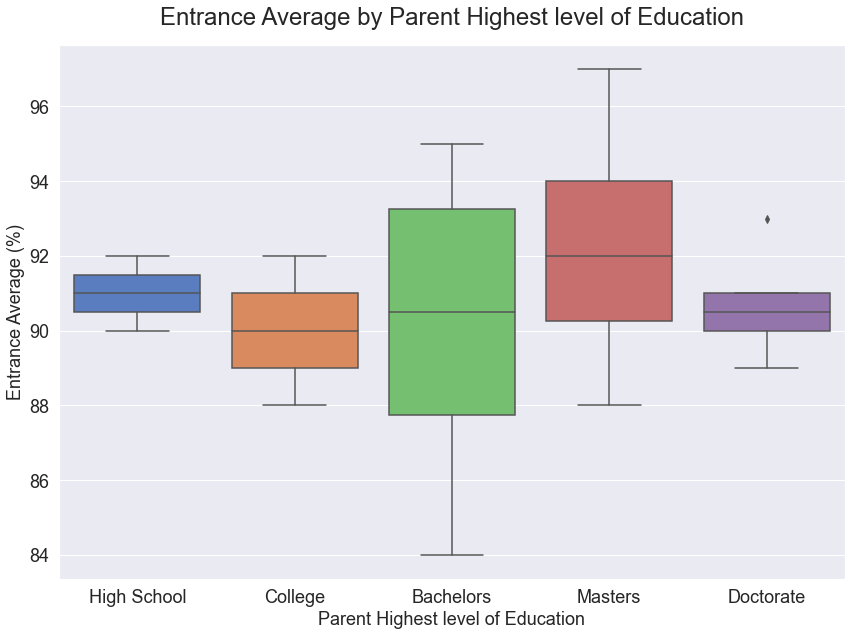

In [28]:
# Entrance Average by Parent's Education

boxplot(
    fname='parental_education_vs_entrance_average',
    title='Entrance Average by Parent Highest level of Education',
    xlabels=["High School","College","Bachelors","Masters","Doctorate"],
    ylabel='Entrance Average (%)',
    data=[
        [90, 92],
        [92, 88],
        [87,89,94,91,88,93,93,84,95,86,95,90],
        [88,97,91,93],
        [90.5,91,93,90,89]

    ],
    xlabel='Parent Highest level of Education'
)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


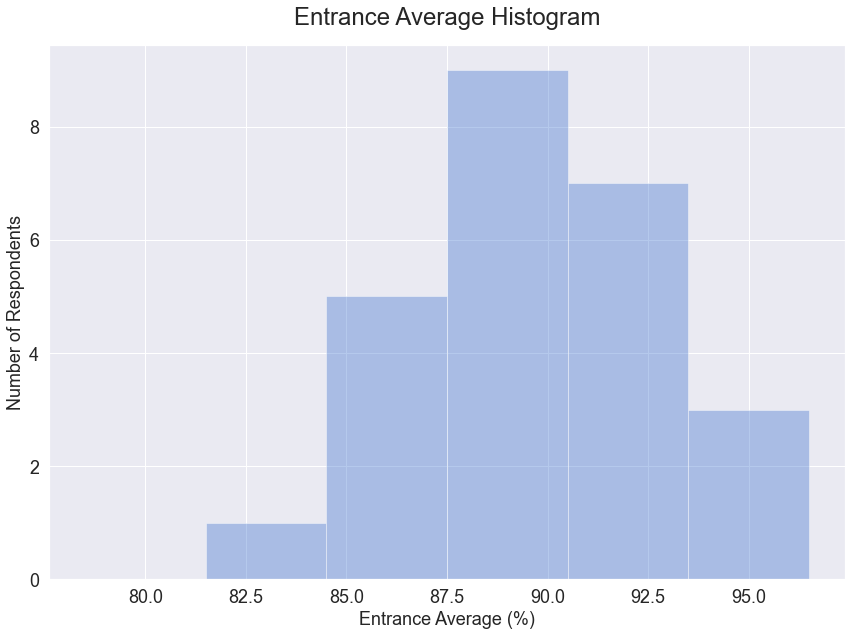

In [29]:
# Entrance Average

density(
    'Entrance Average Histogram',
    fname='entrance_average_hist',
    title='Entrance Average Histogram',
    data = [84,86,87,88,88,88,89,89,90,90,90,90,90,91,91,92,92,93,93,93,93,94,95,95,97],
    xlabel='Entrance Average (%)',
    bins = np.arange(80, 100, 3)
)

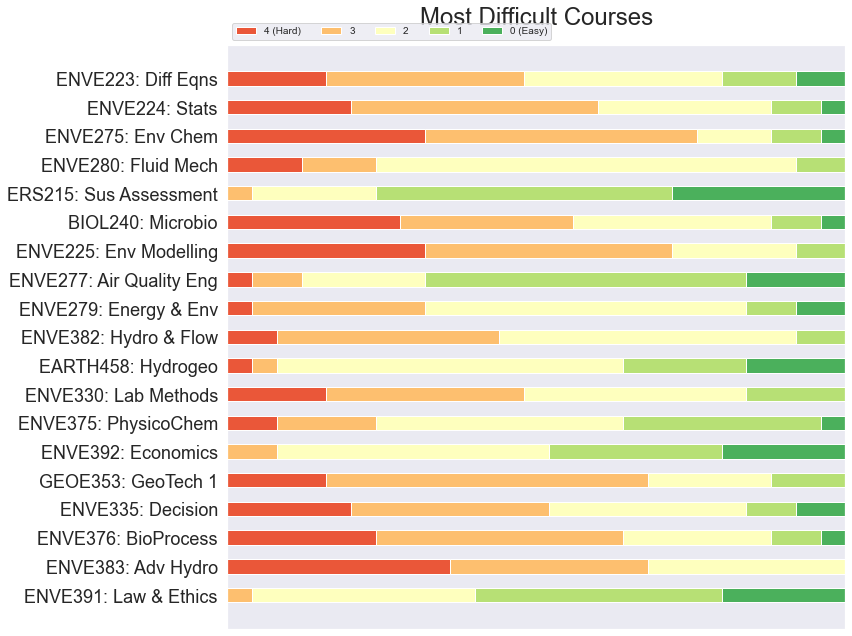

In [30]:
# Most Difficult Courses

category_names = ['4 (Hard)', '3','2', '1', '0 (Easy)']

results = {
    "ENVE223: Diff Eqns" : [4,8,8,3,2],
    "ENVE224: Stats" : [5,10,7,2,1],
    "ENVE275: Env Chem" : [8,11,3,2,1],
    "ENVE280: Fluid Mech" : [3,3,17,2,0],
    "ERS215: Sus Assessment" : [0,1,5,12,7],
    "BIOL240: Microbio" : [7,7,8,2,1],
    "ENVE225: Env Modelling" : [8,10,5,2,0],
    "ENVE277: Air Quality Eng" : [1,2,5,13,4],
    "ENVE279: Energy & Env" : [1,7,13,2,2],
    "ENVE382: Hydro & Flow" : [2,9,12,2,0],
    "EARTH458: Hydrogeo" : [1,1,14,5,4],
    "ENVE330: Lab Methods" : [4,8,9,4,0],
    "ENVE375: PhysicoChem" : [2,4,10,8,1],
    "ENVE392: Economics" : [0,2,11,7,5],
    "GEOE353: GeoTech 1" : [4,13,5,3,0],
    "ENVE335: Decision" : [5,8,8,2,2],
    "ENVE376: BioProcess" : [6,10,6,2,1],
    "ENVE383: Adv Hydro" : [9,8,8,0,0],
    "ENVE391: Law & Ethics": [0,1,9,10,5]
}

stack_barh("most_difficult_course", results=results, category_names=category_names, title="Most Difficult Courses")


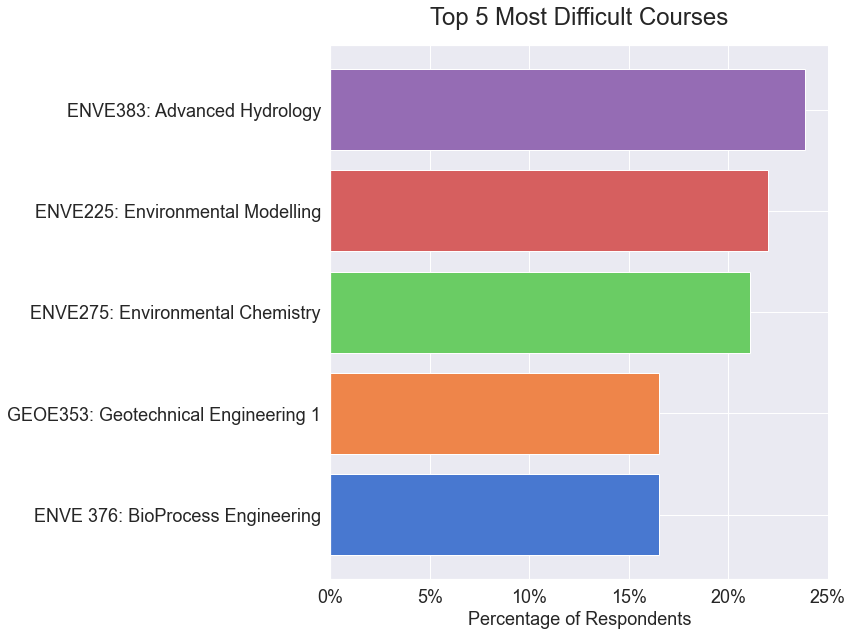

In [31]:
# Top 5 Most Difficult Courses


# "ENVE383: Advanced Hydrology" : [9,8,8,0,0] 26
# "ENVE225: Environmental Modelling" : [8,10,5,2,0] 24
# "ENVE275: Environmental Chemistry" : [8,11,3,2,1] 23
# "ENVE 376: BioProcess Engineering" : [6,10,6,2,1] 18
# "GEOE353: Geotechnical Engineering 1" : [4,13,5,3,0] 18

barh(
    'Top 5 Most Difficult Courses',
    'top_5_difficult_courses',
    data = ["ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology","ENVE383: Advanced Hydrology",
           "ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling",
           "ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry","ENVE275: Environmental Chemistry",
           "ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering","ENVE 376: BioProcess Engineering",
           "GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1"],
    title='Top 5 Most Difficult Courses'
)

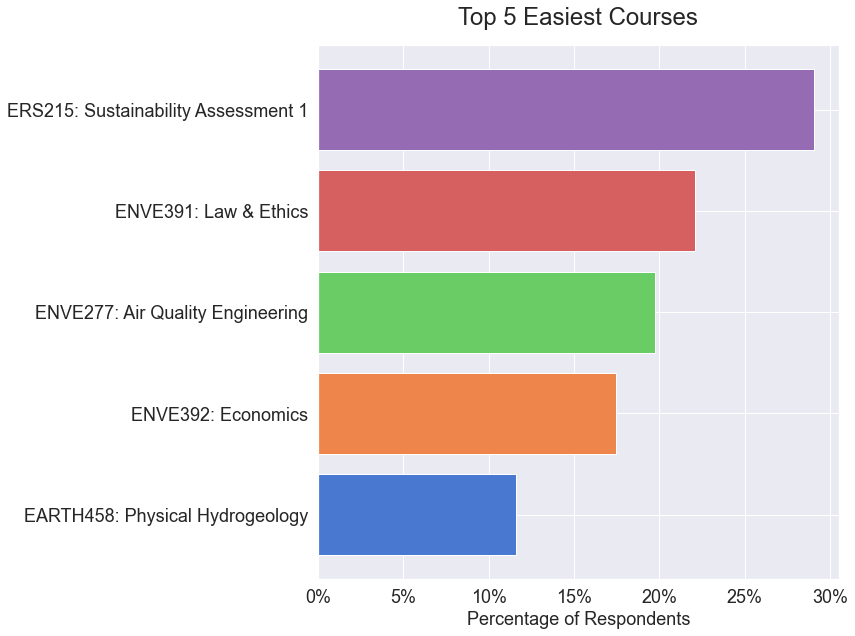

In [32]:
# Top 5 Easiest Courses

# "ERS215: Sustainability Assessment 1" : [0,1,5,12,7] 25
# "ENVE391: Law & Ethics": [0,1,9,10,5] 19
# "ENVE277: Air Quality Eng" : [1,2,5,13,4] 17
# "ENVE392: Economics" : [0,2,11,7,5] 15
# "EARTH458: Physical Hydrogeology" : [1,1,14,5,4] 10


barh(
    'Top 5 Easiest Courses',
    'top_5_easiest_courses',
    data = ["ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1","ERS215: Sustainability Assessment 1",
            "ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics","ENVE391: Law & Ethics",
            "ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering","ENVE277: Air Quality Engineering",
            "ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics","ENVE392: Economics",
            "EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology","EARTH458: Physical Hydrogeology"
           ],
    title='Top 5 Easiest Courses'
)


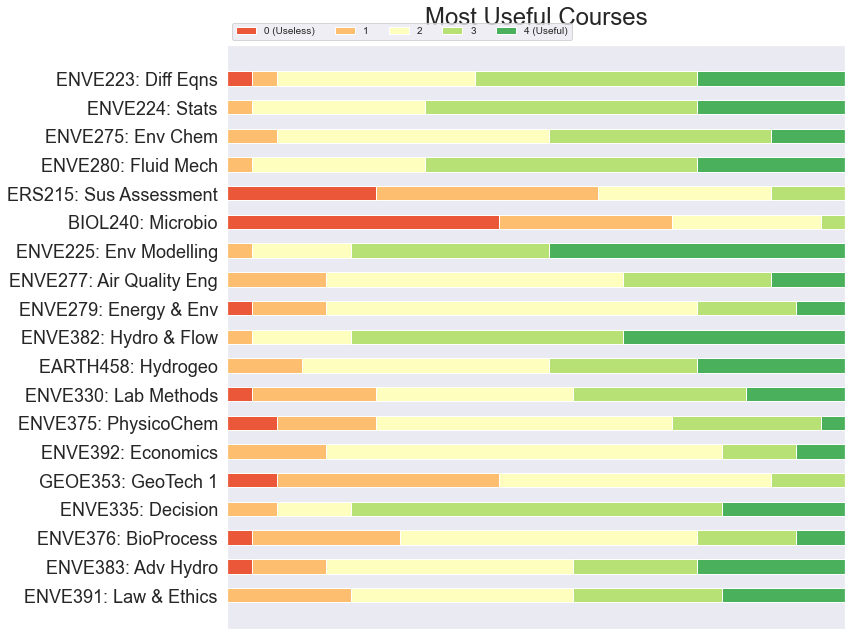

In [33]:
# Most Useful Courses

category_names = ['0 (Useless)', '1', '2', '3', '4 (Useful)']

results = {
    "ENVE223: Diff Eqns" : [1,1,8,9,6],
    "ENVE224: Stats" : [0,1,7,11,6],
    "ENVE275: Env Chem" : [0,2,11,9,3],
    "ENVE280: Fluid Mech" : [0,1,7,11,6],
    "ERS215: Sus Assessment" : [6,9,7,3,0],
    "BIOL240: Microbio" : [11,7,6,1,0],
    "ENVE225: Env Modelling" : [0,1,4,8,12],
    "ENVE277: Air Quality Eng" : [0,4,12,6,3],
    "ENVE279: Energy & Env" : [1,3,15,4,2],
    "ENVE382: Hydro & Flow" : [0,1,4,11,9],
    "EARTH458: Hydrogeo" : [0,3,10,6,6],
    "ENVE330: Lab Methods" : [1,5,8,7,4],
    "ENVE375: PhysicoChem" : [2,4,12,6,1],
    "ENVE392: Economics" : [0,4,16,3,2],
    "GEOE353: GeoTech 1" : [2,9,11,3,0],
    "ENVE335: Decision" : [0,2,3,15,5],
    "ENVE376: BioProcess" : [1,6,12,4,2],
    "ENVE383: Adv Hydro" : [1,3,10,5,6],
    "ENVE391: Law & Ethics": [0,5,9,6,5]
}

stack_barh("most_useful_course", results=results, category_names=category_names, title="Most Useful Courses")


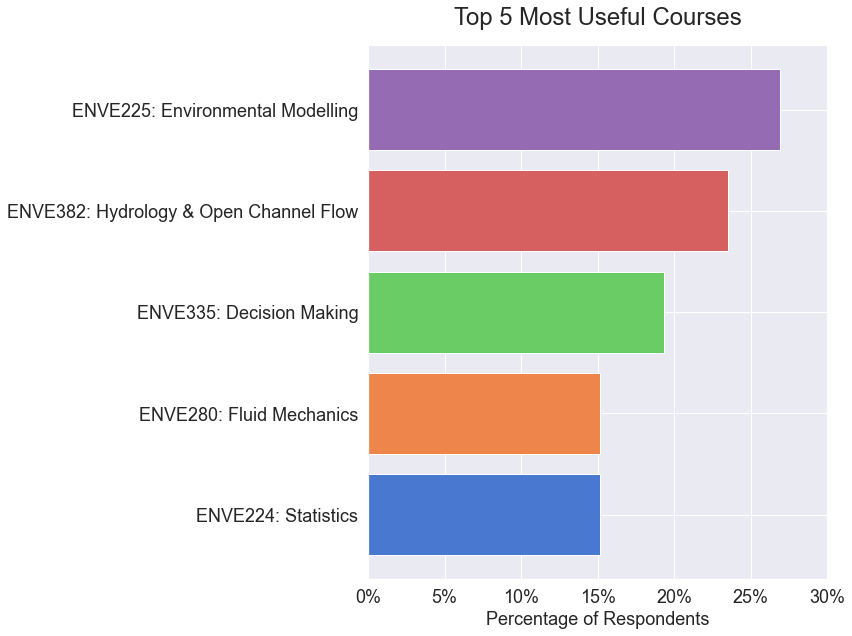

In [34]:
# Top 5 Most Useful Courses

# "ENVE225: Environmental Modelling" : [0,1,4,8,12] 31
# "ENVE382: Hydrology & Open Channel Flow" : [0,1,4,11,9] 28
# "ENVE335: Decision Making" : [0,2,3,15,5] 23
# "ENVE224: Statistics" : [0,1,7,11,6] 18
# "ENVE280: Fluid Mechanics" : [0,1,7,11,6] 18

barh(
    'Top 5 Most Useful Courses',
    'top_5_most_useful_courses',
    data = ["ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling","ENVE225: Environmental Modelling",
            "ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow","ENVE382: Hydrology & Open Channel Flow",
            "ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making","ENVE335: Decision Making",
            "ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics","ENVE224: Statistics",
            "ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics","ENVE280: Fluid Mechanics"
           ],
    title='Top 5 Most Useful Courses'
)

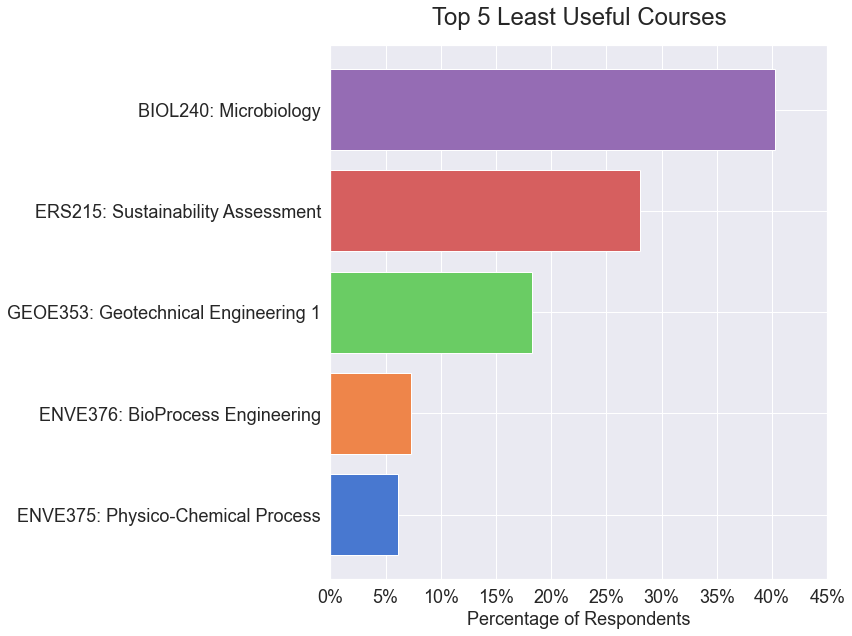

In [35]:
# Top 5 Least Useful Courses

# "BIOL240: Microbiology" : [11,7,6,1,0] 33
# "ERS215: Sus Assessment" : [6,9,7,3,0] 23
# "GEOE353: GeoTech 1" : [2,9,11,3,0] 15
# "ENVE375: PhysicoChem" : [2,4,12,6,1] 5
# "ENVE376: BioProcess" : [1,6,12,4,2] 5

barh(
    'Top 5 Least Useful Courses',
    'top_5_least_useful_courses',
    data = ["BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology","BIOL240: Microbiology",
            "ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment","ERS215: Sustainability Assessment",
            "GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1","GEOE353: Geotechnical Engineering 1",
            "ENVE375: Physico-Chemical Process","ENVE375: Physico-Chemical Process","ENVE375: Physico-Chemical Process","ENVE375: Physico-Chemical Process","ENVE375: Physico-Chemical Process",
            "ENVE376: BioProcess Engineering","ENVE376: BioProcess Engineering","ENVE376: BioProcess Engineering","ENVE376: BioProcess Engineering","ENVE376: BioProcess Engineering","ENVE376: BioProcess Engineering"
           ],
    title='Top 5 Least Useful Courses'
)

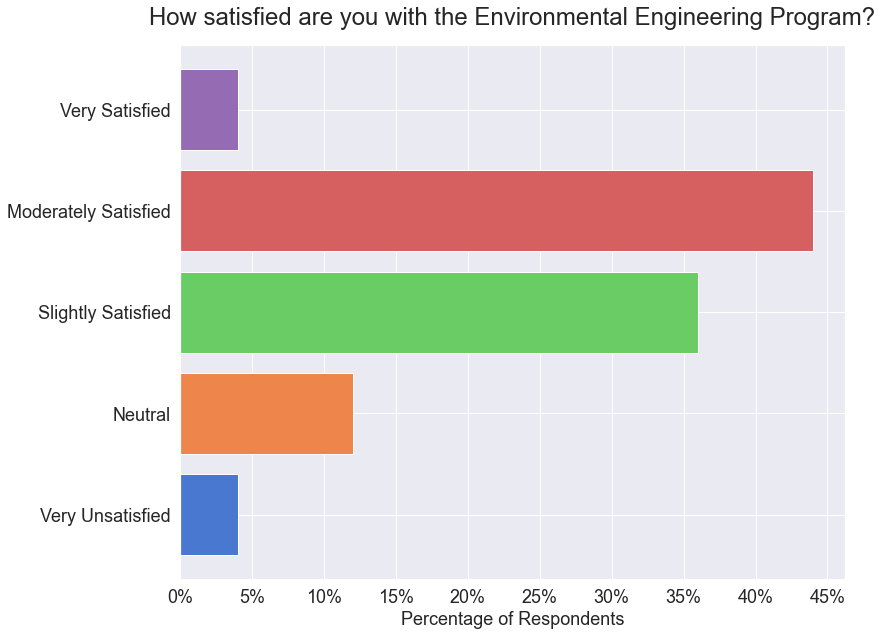

In [36]:
# Program Satisfaction

barh(
    'How satisfied are you with the Environmental Engineering Program?',
    'program_satisfaction',
    data = ["Very Unsatisfied","Slightly Satisfied","Neutral","Moderately Satisfied","Moderately Satisfied","Moderately Satisfied","Moderately Satisfied","Slightly Satisfied","Very Satisfied","Slightly Satisfied","Moderately Satisfied","Moderately Satisfied","Slightly Satisfied","Moderately Satisfied","Neutral","Slightly Satisfied","Slightly Satisfied","Slightly Satisfied","Moderately Satisfied","Moderately Satisfied","Slightly Satisfied","Moderately Satisfied","Moderately Satisfied","Neutral","Slightly Satisfied"],
    title='How satisfied are you with the Environmental Engineering Program?',
    bar_order=["Very Unsatisfied", "Neutral", "Slightly Satisfied", "Moderately Satisfied", "Very Satisfied"]
)

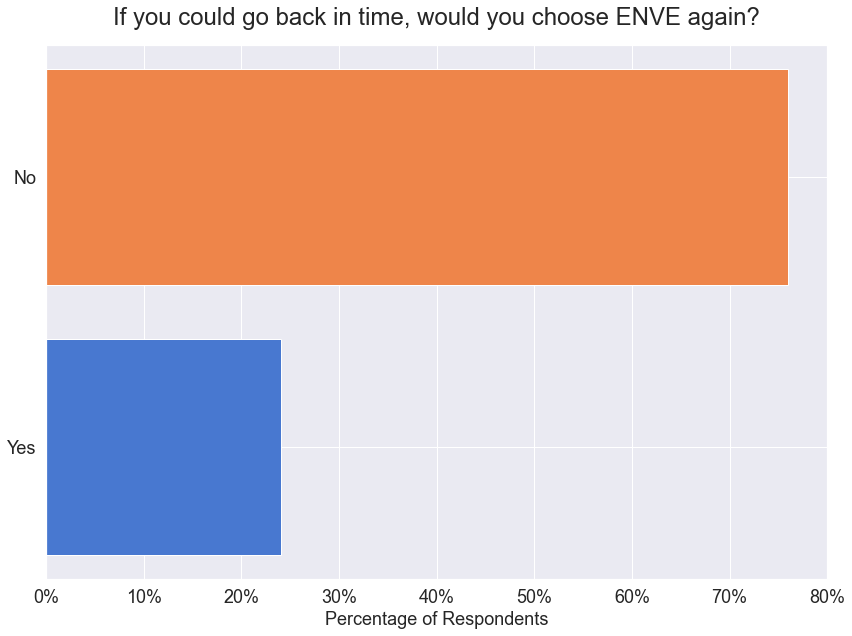

In [37]:
# Choose ENVE Again?

barh(
    'If you could go back in time, would you choose ENVE again?',
    'choose_enve_again',
    data = ["No","No","No","Yes","Yes","No","No","No","No","No","Yes","No","No","Yes","No","No","No","No","No","No","Yes","No","No","No","Yes"],
    title='If you could go back in time, would you choose ENVE again?'
)

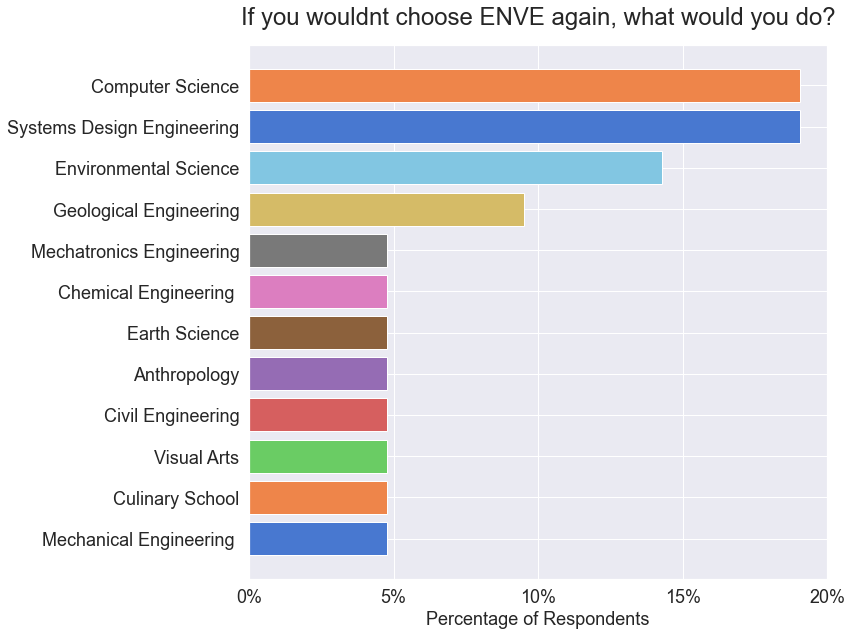

In [38]:
# If you wouldn't choose ENVE, what would you do?

barh(
    'If you wouldnt choose ENVE, what would you do?',
    'choose_enve_again_no',
    data = ["Systems Design Engineering","Computer Science","Mechanical Engineering ","Environmental Science","Systems Design Engineering","Geological Engineering","Systems Design Engineering","Geological Engineering","Culinary School","Visual Arts","Environmental Science","Environmental Science","Computer Science","Civil Engineering","Systems Design Engineering","Computer Science","Anthropology","Earth Science","Computer Science","Chemical Engineering ","Mechatronics Engineering"],
    title='If you wouldnt choose ENVE again, what would you do?'
)